In [1]:
import warnings

warnings.filterwarnings('ignore')
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import shutil
import glob

import random
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools

from google.colab import files




In [2]:
uploaded = files.upload()


Saving colabCV.zip to colabCV.zip
Saving colabTest.zip to colabTest.zip
Saving colabTrain.zip to colabTrain.zip


In [ ]:
!unzip /content/colabTrain.zip
!unzip /content/colabTest.zip
!unzip /content/colabCV.zip


# New Section

In [29]:
#count images according to classes 
pathTrain="/content/colabTrain/"
pathCV = "/content/colabCV/"
pathTest="/content/colabTest/"

numberOfTrain = {}
numberOfCV = {}
numberOfTest={}

images_train_data={}
images_CV_data={}
images_Test_data={}


pathOfEachTrain=[]
pathOfEachCV=[]
pathOfEachtest=[]

for dir in os.listdir(pathTrain):
  images_train_data[dir]=os.listdir(os.path.join(pathTrain,dir))
  pathOfEachTrain.append(os.path.join(pathTrain,dir))
  numberOfTrain[dir] = len(os.listdir(os.path.join(pathTrain,dir)))
for dir in os.listdir(pathCV):
  images_CV_data[dir]=os.listdir(os.path.join(pathCV,dir))
  pathOfEachCV.append(os.path.join(pathCV,dir))
  numberOfCV[dir] = len(os.listdir(os.path.join(pathCV,dir)))
for dir in os.listdir(pathTest):
  images_Test_data[dir]=os.listdir(os.path.join(pathTest,dir))
  pathOfEachtest.append(os.path.join(pathTest,dir))
  numberOfTest[dir] = len(os.listdir(os.path.join(pathTest,dir)))

In [30]:
label=[]
pathOfEachTrain[0]
print(numberOfTrain)
print(numberOfCV)
print(numberOfTest)

{'NoTumor': 501, 'Tumor': 500}
{'NoTumor': 51, 'Tumor': 51}
{'NoTumor': 49, 'Tumor': 49}


In [31]:
#data augm train
trainGen = ImageDataGenerator(
                             vertical_flip=True,
                             rescale=1/255

                             )

Train_prepare = trainGen.flow_from_directory(directory = pathTrain,target_size=(224,224),batch_size=32,class_mode='binary')

Found 1001 images belonging to 2 classes.


Found 98 images belonging to 2 classes.


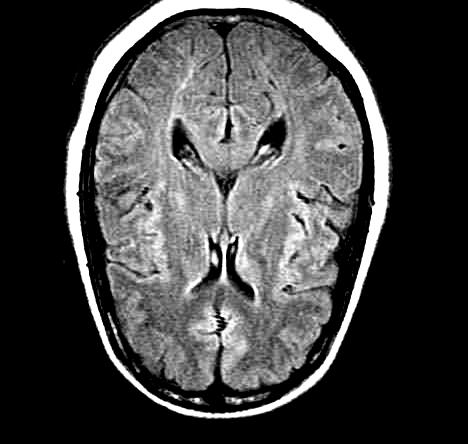

In [32]:

datagen = ImageDataGenerator(
                             rescale=1/255
                             )
test_prepare = datagen.flow_from_directory(directory = pathTest,target_size=(224,224),batch_size=7,class_mode='binary')

image1=cv2.imread(test_prepare.filepaths[5])
cv2_imshow( image1)

Found 102 images belonging to 2 classes.


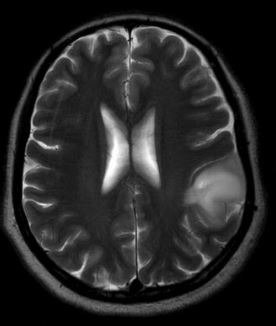

In [33]:

CV_prepare = datagen.flow_from_directory(directory = pathCV,target_size=(224,224),batch_size=6,class_mode='binary')
CV_prepare

image1=cv2.imread(CV_prepare.filepaths[5])
cv2_imshow( image1)


In [9]:
dec_list = tf.test.gpu_device_name()


In [10]:
dec_list

'/device:GPU:0'

In [71]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy",filepath="brainTumor.h5",save_best_only=True,verbose=1,mode='auto') 
cd=[es,mc] 


In [12]:
#@title Mobile net



In [35]:
MN = MobileNet(input_shape=(224,224,3),include_top=False)

In [36]:
for layer in MN.layers:
    layer.trainable = False

In [81]:
Out = Flatten()(MN.output)
Out = Dense(1,activation='sigmoid')(Out)

In [82]:

model = Model(inputs = MN.input,outputs=Out)
model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [83]:
model.compile(
    loss=binary_crossentropy,
    metrics=['accuracy'],
    optimizer=Adam(0.001)
)


In [84]:
final=model.fit(Train_prepare
                          ,epochs=30
                          ,validation_data=CV_prepare
                          ,callbacks=cd)

Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 0.7672 - accuracy: 0.8571
Epoch 1: val_accuracy did not improve from 0.96078
32/32 [==============================] - 5s 127ms/step - loss: 0.7672 - accuracy: 0.8571 - val_loss: 0.4498 - val_accuracy: 0.9020
Epoch 2/30
32/32 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9740
Epoch 2: val_accuracy did not improve from 0.96078
32/32 [==============================] - 4s 115ms/step - loss: 0.0790 - accuracy: 0.9740 - val_loss: 0.1594 - val_accuracy: 0.9510
Epoch 3/30
31/32 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9879
Epoch 3: val_accuracy improved from 0.96078 to 0.99020, saving model to brainTumor.h5
32/32 [==============================] - 4s 119ms/step - loss: 0.0474 - accuracy: 0.9880 - val_loss: 0.0404 - val_accuracy: 0.9902
Epoch 4/30
32/32 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9990
Epoch 4: val_accuracy did not improve from 

In [85]:
f=final.history
print(f.keys())
print(max(f['accuracy'])*100)
print(max(f['val_accuracy'])*100)
print(min(f['loss'])*100)
print(min(f['val_loss'])*100)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
99.90010261535645
99.01960492134094
0.32377983443439007
4.038465768098831


In [86]:
model = load_model("/content/brainTumor.h5")

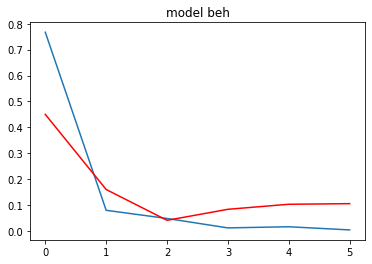

In [87]:
plt.plot(f['loss'])
plt.plot(f['val_loss'],c="red")
plt.title("model beh")
plt.show()


In [90]:
accuracy_score = model.evaluate(test_prepare)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

14/14 [==============================] - 0s 28ms/step - loss: 0.1498 - accuracy: 0.9592
[0.1498112678527832, 0.9591836929321289]
Accuracy: 95.9184%
Loss:  0.1498112678527832


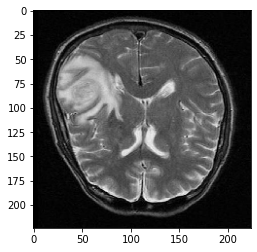

1/1 [==============================] - 0s 21ms/step
[[0.9999695]]
have a cancer


In [91]:
path = "/content/colabTest/Tumor/y766.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)
print(pred)
if pred>0.5:
  print("have a cancer")
else:
  print("dosent have cancer")


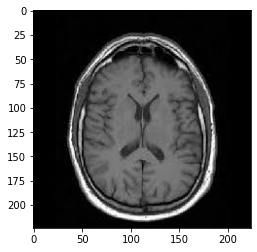

1/1 [==============================] - 0s 18ms/step
[[2.319979e-08]]
dosent have cancer


In [92]:
path = "/content/colabTest/NoTumor/no552.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)
print(pred)
if pred>0.5:
  print("have a cancer")
else:
  print("dosent have cancer")
